In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset DL UTS/Bank_Loan_Granting.csv")

#1a. Preprocessing Data

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


df.head() untuk melihat baris awal data dan bagaimana bentuk datanya

In [5]:
df.shape

(5000, 14)

df.shape untuk melihat dimensi data, dalam dataset ini memiliki 5000 baris dan 14 kolom

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

df.columns untuk melihat kolom-kolom yang ada dalam dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


df.info untuk melihat data type setiap kolomnya

In [8]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

untuk melihat apakah ada missing value dari datasetnya

In [9]:
#drop columns yang tidak digunakan
drop_cols = ['ID', 'ZIP Code']
df = df.drop(drop_cols, axis = 1)

Disini saya, drop column 'ID' dan 'ZIP Code' karena menganggap bahwa columns tersebut tidak mempengaruhi hasil prediksi yang akan dilakukan.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   Family              5000 non-null   int64 
 4   CCAvg               5000 non-null   object
 5   Education           5000 non-null   int64 
 6   Mortgage            5000 non-null   int64 
 7   Personal Loan       5000 non-null   int64 
 8   Securities Account  5000 non-null   int64 
 9   CD Account          5000 non-null   int64 
 10  Online              5000 non-null   int64 
 11  CreditCard          5000 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 468.9+ KB


In [11]:
df['Income'] = df['Income']/12

Saya mengubah income dari annually menjadi monthly karena CC Avg yang diberikan juga monthly

In [12]:
df['CCAvg'] = df['CCAvg'].str.replace("/",'.').astype(np.float64)

Disini saya mengubah CCAvg yang awalnya mempunya data type object menjadi float

In [13]:
df['CCAvg'] = df['CCAvg'].where(df['CreditCard'] != 0, 0)

Disini saya mengubah pemakaian rata-rata kartu kredit menjadi 0, jika customer tidak memiliki kartu kredit.

In [14]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.083333,4,0.0,1,0,0,1,0,0,0
1,45,19,2.833333,3,0.0,1,0,0,1,0,0,0
2,39,15,0.916667,1,0.0,1,0,0,0,0,0,0
3,35,9,8.333333,1,0.0,2,0,0,0,0,0,0
4,35,8,3.750000,4,1.0,2,0,0,0,0,0,1


In [15]:
df['Experience'].value_counts()

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: count, dtype: int64

In [16]:
df['Experience'] = df['Experience'].abs()

Saya mengubah column experience yang negative menjadi positive, karena nilai experience tidak mungkin negative

In [17]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,6.147850,2.396400,0.564428,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,3.836144,1.147663,1.282343,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,0.666667,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,3.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,5.333333,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,8.166667,3.000000,0.400000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,18.666667,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


df.describe untuk melihat ringkasan statistik dari kolom numerik dataset

#1b. Data Exploration

<Axes: >

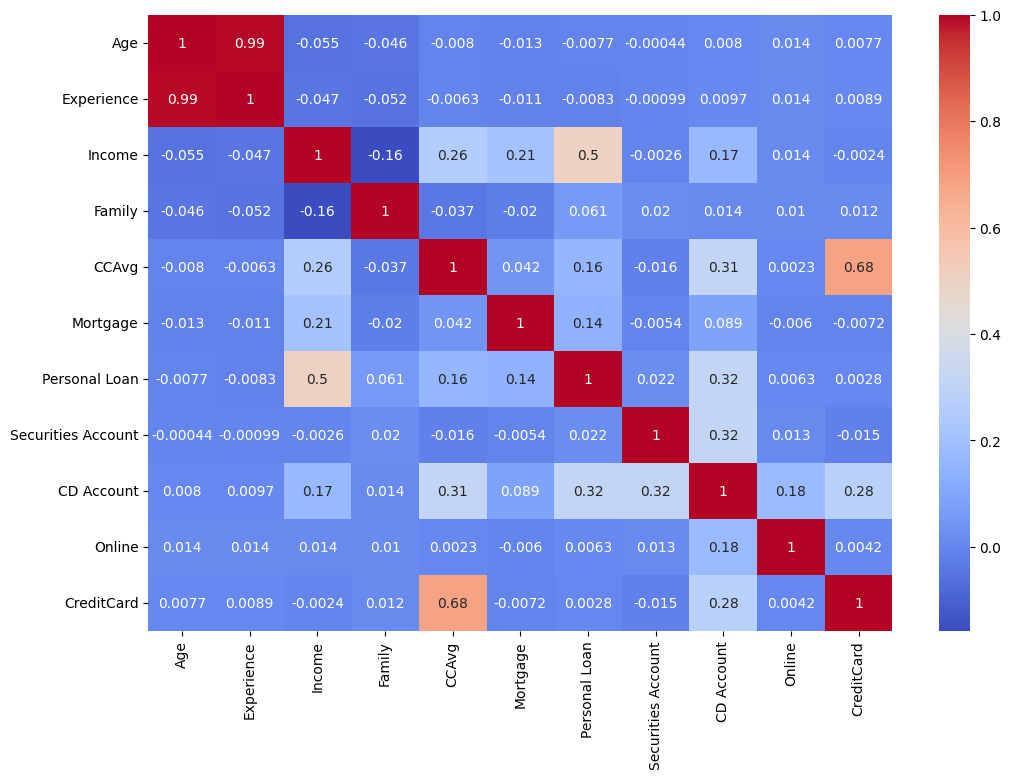

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard']].corr(), annot=True, cmap='coolwarm')

<function matplotlib.pyplot.show(close=None, block=None)>

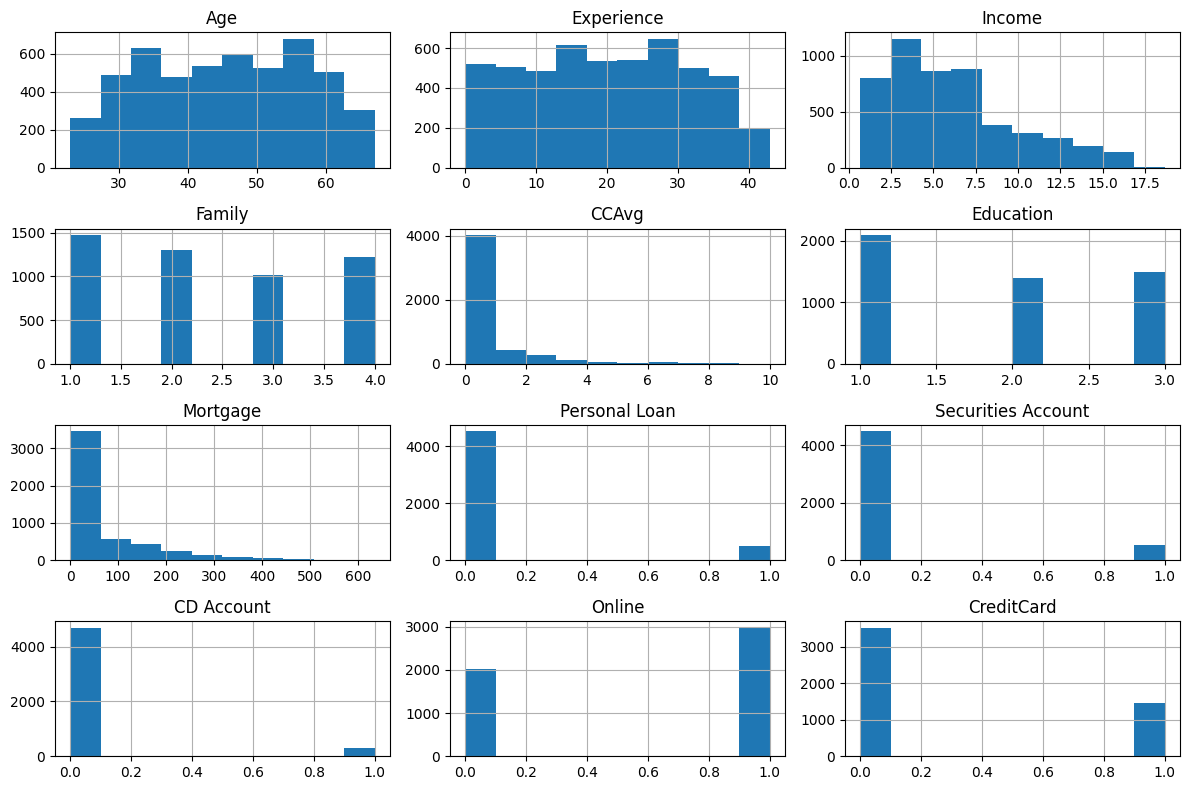

In [19]:
df.hist(figsize =(12,8))
plt.tight_layout()
plt.show

untuk melihat distribusi setiap kolomnya, dapat dilihat yang normally distributed hanya age dan experience

<function matplotlib.pyplot.show(close=None, block=None)>

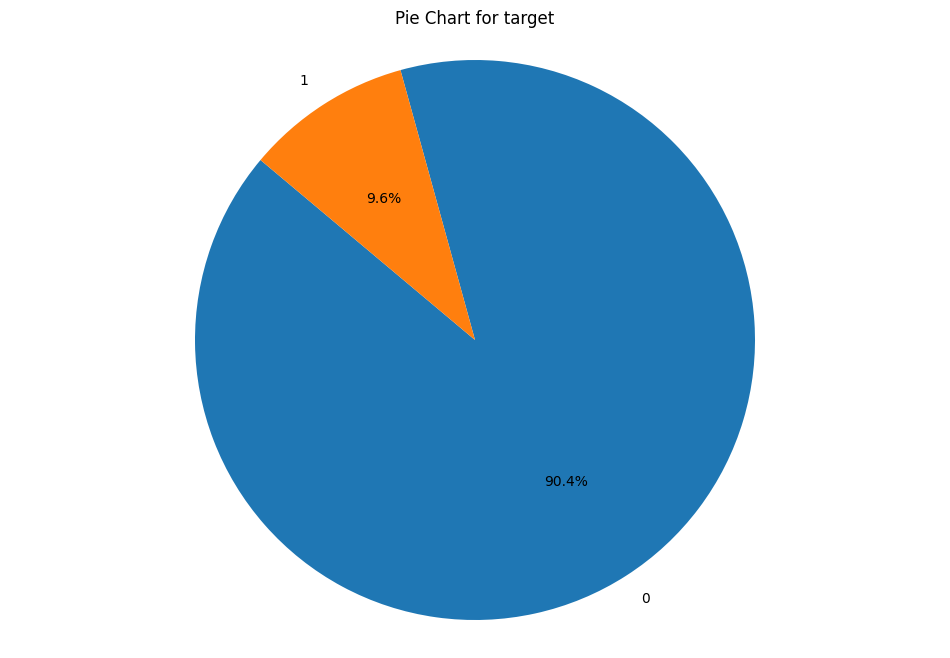

In [20]:
target_counts = df['Personal Loan'].value_counts()
plt.figure(figsize=(12,8))
plt.pie(target_counts, labels = target_counts.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Pie Chart for target')
plt.axis('equal')
plt.show

Saya menampilkan pie plot untuk ratio personal loan yang diapprove dan tidak

In [21]:
continous_features = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]
discrete_features = df[['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]

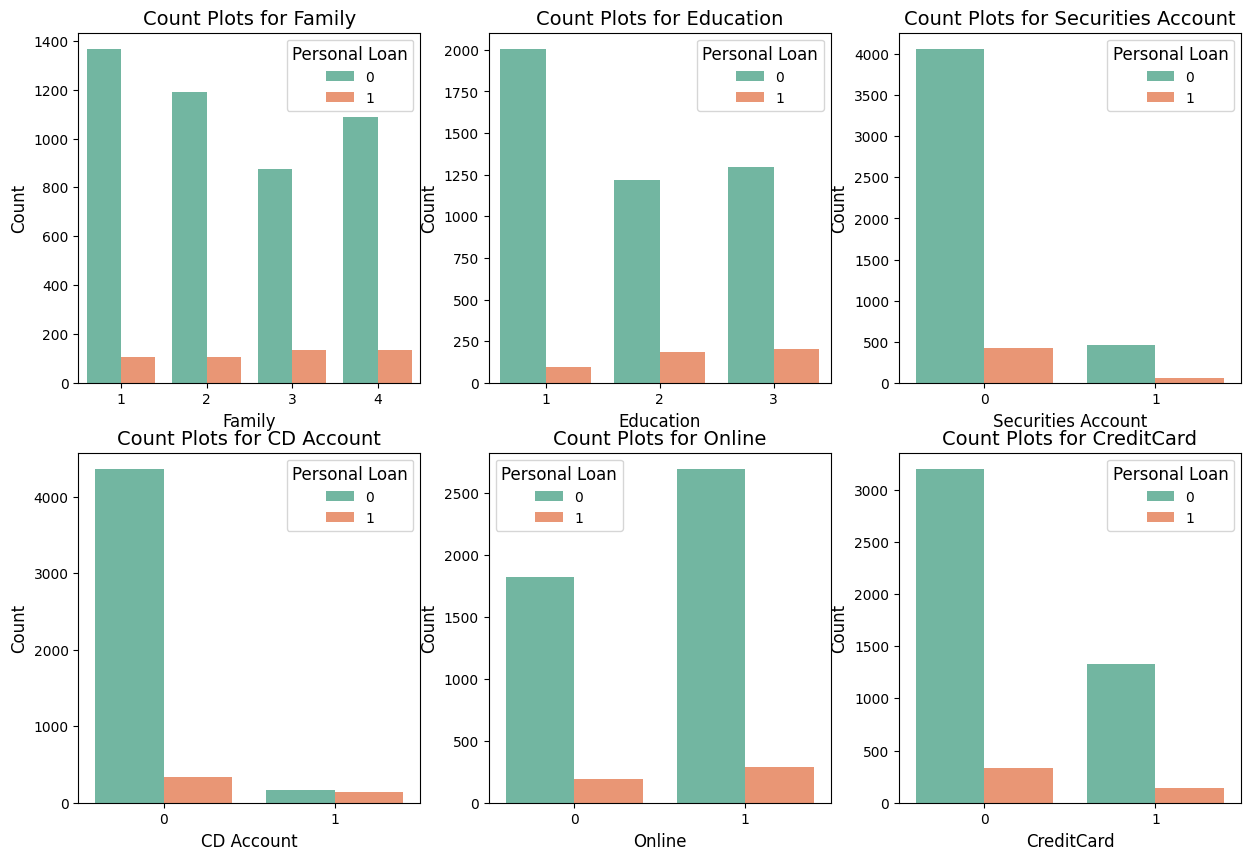

In [24]:
plt.figure(figsize=(15,10))
for i, col in enumerate(discrete_features.columns, 1):
  plt.subplot(2,3,i)
  sns.countplot(data=df, x = col, hue ='Personal Loan', palette ='Set2')
  plt.title(f"Count Plots for {col}", fontsize =14)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Count', fontsize=12)
  plt.legend(title='Personal Loan', title_fontsize='12')
plt.show()


Saya membuat bar graph untuk discrete features dengan perbandingan personal loan untuk setiap valuenya.

Dari graph di atas CD Account adalah faktor besar agar customer bisa mendapatkan Personal Loan, karena dapat kita lihat bahwa jika customer memiliki CD Account, bank akan approve personal loan yang diajukan.

TRAIN TEST SPLIT

In [25]:
x_train, x_test_val, y_train, y_test_val = train_test_split(df.drop('Personal Loan', axis=1), df['Personal Loan'], test_size=0.2, random_state=42, stratify=df['Personal Loan'])
x_val, x_test, y_val, y_test = train_test_split(x_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val)

print("Train data:", x_train.shape[0], x_train.shape[1])
print("Validate data:", x_val.shape[0], x_val.shape[1])
print("Test data:", x_test.shape[0], x_test.shape[1])

Train data: 4000 11
Validate data: 500 11
Test data: 500 11


splitting data dengan proporsi 80,10,10

#1c.  Outliers, Encode, Scaling

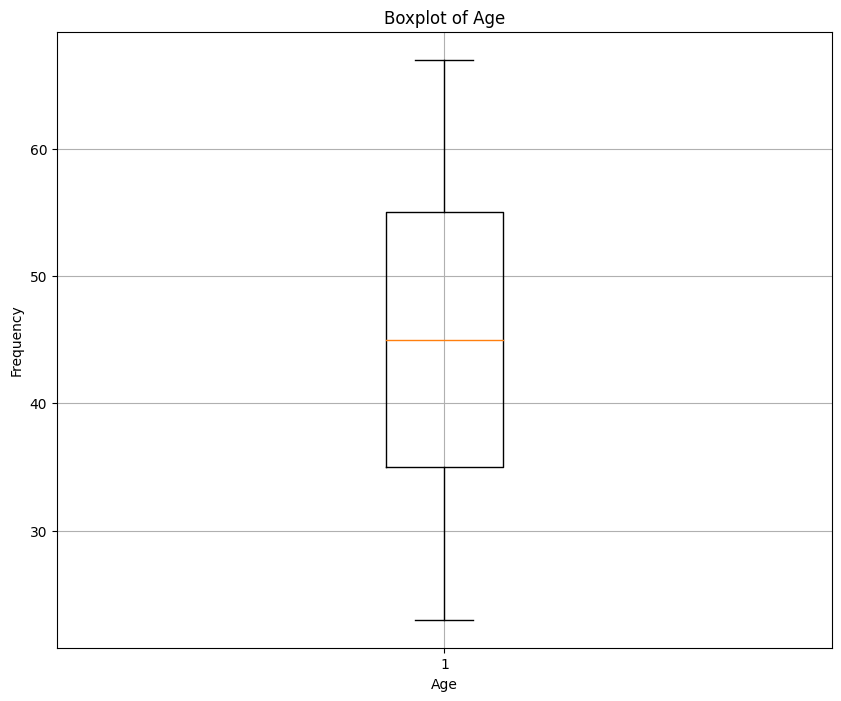

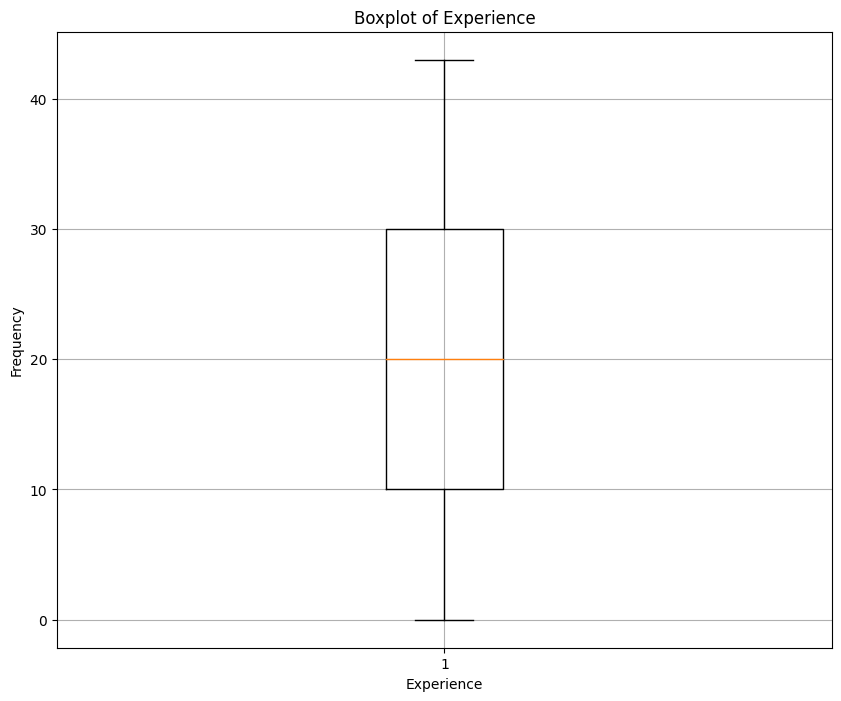

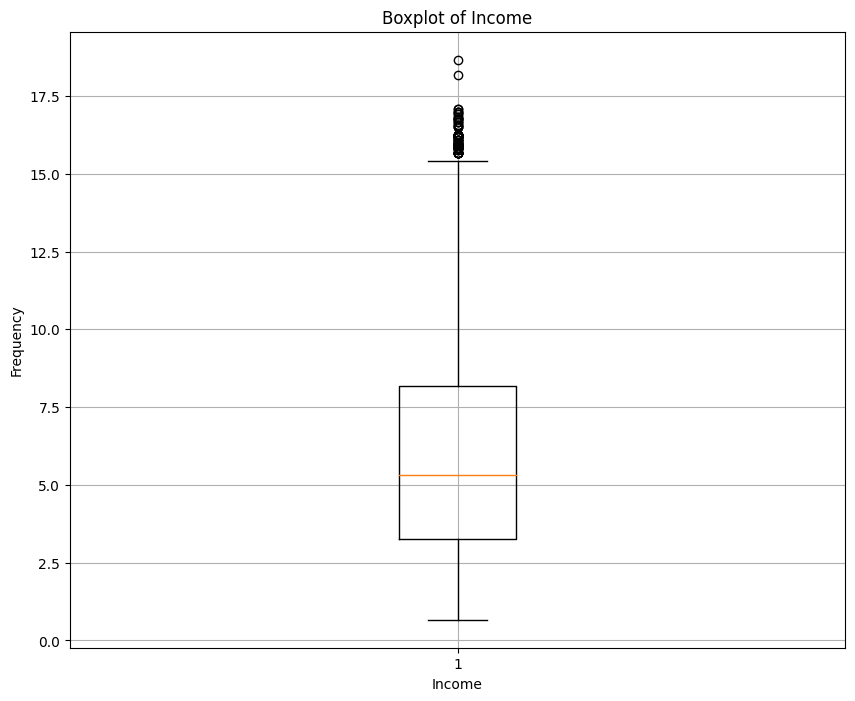

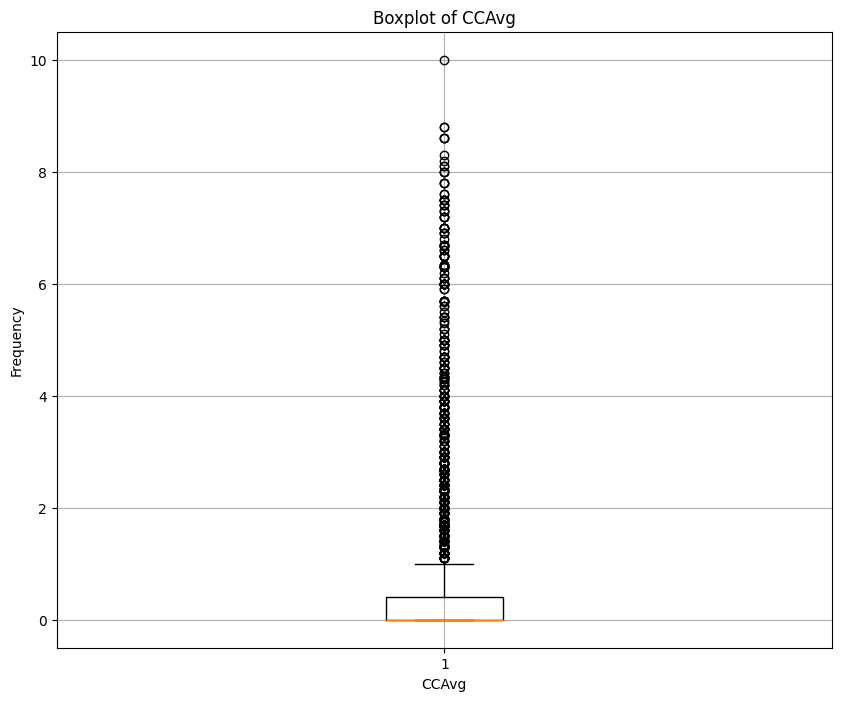

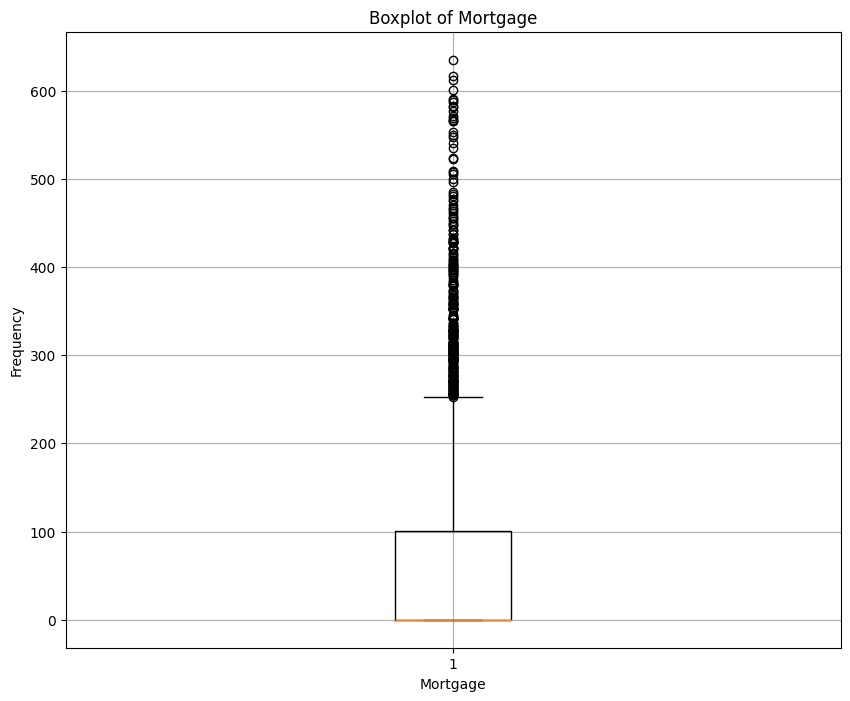

In [22]:
for feature in continous_features:
  plt.figure(figsize=(10,8))
  plt.boxplot(df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

Saya menggunakan boxplot untuk menampilkan apakah ada outlier atau tidak, namun outlier tidak saya handle karena target case ini merupakah pinjaman bank, maka menurut saya data yang dipakai lebih bagus untuk tidak diubah

ENCODING (TRAIN DATA)

In [26]:
x_train['Education'].value_counts()

Education
1    1683
3    1209
2    1108
Name: count, dtype: int64

In [27]:
x_train['Education'].replace({1:'undergraduate', 2:'graduate', 3: 'professional'}, inplace = True)

In [28]:
x_train = pd.get_dummies(x_train, columns=['Education'], prefix = 'Education')

In [29]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 408 to 4785
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4000 non-null   int64  
 1   Experience               4000 non-null   int64  
 2   Income                   4000 non-null   float64
 3   Family                   4000 non-null   int64  
 4   CCAvg                    4000 non-null   float64
 5   Mortgage                 4000 non-null   int64  
 6   Securities Account       4000 non-null   int64  
 7   CD Account               4000 non-null   int64  
 8   Online                   4000 non-null   int64  
 9   CreditCard               4000 non-null   int64  
 10  Education_graduate       4000 non-null   bool   
 11  Education_professional   4000 non-null   bool   
 12  Education_undergraduate  4000 non-null   bool   
dtypes: bool(3), float64(2), int64(8)
memory usage: 355.5 KB


In [30]:
bool_cols = ['Education_graduate', 'Education_professional', 'Education_undergraduate']
x_train[bool_cols] = x_train[bool_cols].astype(int)

In [31]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_graduate,Education_professional,Education_undergraduate
408,60,36,7.416667,2,0.0,0,0,0,1,0,0,0,1
3737,44,19,2.500000,1,0.0,0,0,0,1,0,0,1,0
3889,26,0,1.583333,1,0.0,121,0,0,1,0,1,0,0
568,34,9,3.416667,2,0.1,161,0,0,1,1,0,0,1
1041,56,32,4.250000,4,0.0,0,0,0,0,0,0,0,1


ENCODING (VAL DATA)

In [32]:
x_val['Education'].value_counts()

Education
1    200
3    160
2    140
Name: count, dtype: int64

In [33]:
x_val['Education'].replace({1:'undergraduate', 2:'graduate', 3: 'professional'}, inplace = True)

In [34]:
x_val = pd.get_dummies(x_val, columns=['Education'], prefix = 'Education')

In [35]:
x_val[bool_cols] = x_val[bool_cols].astype(int)

In [36]:
x_val.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_graduate,Education_professional,Education_undergraduate
208,40,16,6.083333,4,2.67,0,0,0,1,1,0,0,1
885,31,5,2.500000,4,0.00,0,0,0,1,0,1,0,0
2244,57,31,4.416667,1,0.00,120,0,0,0,0,1,0,0
1423,55,30,5.333333,2,0.00,0,0,0,0,0,0,1,0
4116,24,2,11.250000,2,0.00,0,0,0,1,0,0,0,1


ENCODING (TEST DATA)

In [37]:
x_test['Education'].value_counts()

Education
1    213
2    155
3    132
Name: count, dtype: int64

In [38]:
x_test['Education'].replace({1:'undergraduate', 2:'graduate', 3: 'professional'}, inplace = True)

In [39]:
x_test = pd.get_dummies(x_test, columns=['Education'], prefix = 'Education')

In [40]:
x_test[bool_cols] = x_test[bool_cols].astype(int)

In [41]:
x_test.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_graduate,Education_professional,Education_undergraduate
2671,62,37,10.666667,1,0.0,0,0,0,0,0,0,0,1
4463,39,13,5.750000,3,0.0,0,0,0,0,0,0,0,1
536,25,1,3.583333,3,0.0,176,0,0,1,0,1,0,0
2658,30,4,3.666667,1,0.0,109,0,0,0,0,0,0,1
1915,37,11,5.750000,3,0.0,0,1,0,0,0,0,0,1


Scaling

Disini saya menggunakan robust scaling karena teknik scaling ini paling baik  untuk dataset yang mengandung outlier

In [62]:
scaler = RobustScaler()

In [63]:
scale_cols = ['Age', 'Experience', 'Income', 'Mortgage', 'CCAvg']
x_train[scale_cols] = scaler.fit_transform(x_train[scale_cols])

In [64]:
x_val[scale_cols] = scaler.transform(x_val[scale_cols])
x_test[scale_cols] = scaler.transform(x_test[scale_cols])

In [65]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_graduate,Education_professional,Education_undergraduate
408,0.75,0.80,0.433333,2,0.000000,0.00,0,0,1,0,0,0,1
3737,-0.05,-0.05,-0.550000,1,0.000000,0.00,0,0,1,0,0,1,0
3889,-0.95,-1.00,-0.733333,1,0.000000,1.21,0,0,1,0,1,0,0
568,-0.55,-0.55,-0.366667,2,0.333333,1.61,0,0,1,1,0,0,1
1041,0.55,0.60,-0.200000,4,0.000000,0.00,0,0,0,0,0,0,1


In [66]:
x_test.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_graduate,Education_professional,Education_undergraduate
2671,0.85,0.85,1.083333,1,0.0,0.00,0,0,0,0,0,0,1
4463,-0.30,-0.35,0.100000,3,0.0,0.00,0,0,0,0,0,0,1
536,-1.00,-0.95,-0.333333,3,0.0,1.76,0,0,1,0,1,0,0
2658,-0.75,-0.80,-0.316667,1,0.0,1.09,0,0,0,0,0,0,1
1915,-0.40,-0.45,0.100000,3,0.0,0.00,1,0,0,0,0,0,1


In [67]:
x_val.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_graduate,Education_professional,Education_undergraduate
208,-0.25,-0.20,0.166667,4,8.9,0.0,0,0,1,1,0,0,1
885,-0.70,-0.75,-0.550000,4,0.0,0.0,0,0,1,0,1,0,0
2244,0.60,0.55,-0.166667,1,0.0,1.2,0,0,0,0,1,0,0
1423,0.50,0.50,0.016667,2,0.0,0.0,0,0,0,0,0,1,0
4116,-1.05,-0.90,1.200000,2,0.0,0.0,0,0,1,0,0,0,1


In [68]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 408 to 4785
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4000 non-null   float64
 1   Experience               4000 non-null   float64
 2   Income                   4000 non-null   float64
 3   Family                   4000 non-null   int64  
 4   CCAvg                    4000 non-null   float64
 5   Mortgage                 4000 non-null   float64
 6   Securities Account       4000 non-null   int64  
 7   CD Account               4000 non-null   int64  
 8   Online                   4000 non-null   int64  
 9   CreditCard               4000 non-null   int64  
 10  Education_graduate       4000 non-null   int64  
 11  Education_professional   4000 non-null   int64  
 12  Education_undergraduate  4000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 437.5 KB


#1d. Baseline Architecture

BASELINE MODEL

In [69]:
n_input = x_train.shape[1]
n_hidden = 2 * n_input
num_class =  2

model1 = Sequential()
model1.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model1.add(Dense(n_hidden, activation='relu'))
model1.add(Dense(num_class, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

print(model1.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 26)                364       
                                                                 
 dense_13 (Dense)            (None, 26)                702       
                                                                 
 dense_14 (Dense)            (None, 2)                 54        
                                                                 
Total params: 1120 (4.38 KB)
Trainable params: 1120 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Baseline arsitektur ini dibuat berdasarkan kriteria yang diberikan pada soal:
*   input layer = n nodes
*   2 hidden layer = 2 x n nodes, activation pada hidden layer menggunakan ReLU
*   output layer = num_class
*   menggunakan loss = binary_crossentropy, optimizer = adam dan metrics = accuracy



#1e. Modification Architecture

MODIFICATION MODEL

In [70]:
n_input = x_train.shape[1]
n_hidden = 2 * n_input
num_class =  2

model2 = Sequential()
model2.add(Dense(n_hidden, input_dim=n_input, activation='relu'))

model2.add(Dropout(0.2))
model2.add(Dense(n_hidden, activation='relu'))

model2.add(Dropout(0.2))
model2.add(Dense(num_class, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 26)                364       
                                                                 
 dropout_4 (Dropout)         (None, 26)                0         
                                                                 
 dense_16 (Dense)            (None, 26)                702       
                                                                 
 dropout_5 (Dropout)         (None, 26)                0         
                                                                 
 dense_17 (Dense)            (None, 2)                 54        
                                                                 
Total params: 1120 (4.38 KB)
Trainable params: 1120 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Untuk modifikasi arsitektur model, saya hanya menambahkan Dropout 0.2 untuk mencegah overfitting terjadi. Teknik ini mengabaikan sebagian neuron secara acak selama proses pelatihan agar memaksa model untuk belajar fitur-fitur yang lebih robust dan umum.

#1f. Model Evaluation

EVALUATION

In [71]:
y_train_cat = to_categorical(y_train, num_classes=num_class)
y_val_cat = to_categorical(y_val, num_classes=num_class)
y_test_cat = to_categorical(y_test, num_classes=num_class)

#train model1
history_model1 = model1.fit(x_train, y_train_cat, epochs=50, batch_size=32, validation_data=(x_val, y_val_cat))
#evaluate model1
y_pred_model1 = model1.predict(x_test)
y_pred_class_model1 = np.argmax(y_pred_model1, axis = 1)

Epoch 1/50
125/125 [==============================] - 1s 4ms/step - loss: 0.4061 - accuracy: 0.8758 - val_loss: 0.2695 - val_accuracy: 0.9040
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9095 - val_loss: 0.1670 - val_accuracy: 0.9220
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9460 - val_loss: 0.1143 - val_accuracy: 0.9660
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1129 - accuracy: 0.9632 - val_loss: 0.0917 - val_accuracy: 0.9780
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9680 - val_loss: 0.0798 - val_accuracy: 0.9740
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9732 - val_loss: 0.0694 - val_accuracy: 0.9780
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9745 - val_loss: 0.0640 - val_accuracy: 0.9800
Epoch 

Untuk training baseline model, saya menggunakan epochs sebanyak 50 kali dengan batch size sebesar 32.

In [72]:
#classification report
accuracy_model1 = accuracy_score(y_test, y_pred_class_model1) * 100
precision_model1 = precision_score(y_test, y_pred_class_model1) * 100
recall_model1 = recall_score(y_test, y_pred_class_model1) * 100
f1_model1 = f1_score(y_test, y_pred_class_model1) * 100

print('Classification Report for Baseline Model:')
print('Accuracy: {:.2f}'.format(accuracy_model1))
print('Precision: {:.2f}'.format(precision_model1))
print('Recall: {:.2f}'.format(recall_model1))
print('F1-Score: {:.2f}'.format(f1_model1))

Classification Report for Baseline Model:
Accuracy: 98.00
Precision: 93.18
Recall: 85.42
F1-Score: 89.13


In [73]:
#train model2
history_model2 = model2.fit(x_train, y_train_cat, epochs = 30, batch_size = 64, validation_data=(x_val, y_val_cat))

#evaluate model1
y_pred_model2 = model2.predict(x_test)
y_pred_class_model2 = np.argmax(y_pred_model2, axis = 1)

Epoch 1/30
63/63 [==============================] - 2s 10ms/step - loss: 0.5186 - accuracy: 0.8405 - val_loss: 0.3556 - val_accuracy: 0.9040
Epoch 2/30
63/63 [==============================] - 0s 6ms/step - loss: 0.3531 - accuracy: 0.9015 - val_loss: 0.2772 - val_accuracy: 0.9060
Epoch 3/30
63/63 [==============================] - 0s 4ms/step - loss: 0.2949 - accuracy: 0.9062 - val_loss: 0.2182 - val_accuracy: 0.9080
Epoch 4/30
63/63 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9175 - val_loss: 0.1838 - val_accuracy: 0.9280
Epoch 5/30
63/63 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9240 - val_loss: 0.1627 - val_accuracy: 0.9360
Epoch 6/30
63/63 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9298 - val_loss: 0.1438 - val_accuracy: 0.9440
Epoch 7/30
63/63 [==============================] - 0s 3ms/step - loss: 0.1814 - accuracy: 0.9345 - val_loss: 0.1328 - val_accuracy: 0.9560
Epoch 8/30
63/63 [=

Untuk training modification model, saya mengubah jumlah epochs menjadi 30 kali dan mengubah batch size menjadi 64

In [74]:
#classification report
accuracy_model2 = accuracy_score(y_test, y_pred_class_model2) * 100
precision_model2 = precision_score(y_test, y_pred_class_model2) * 100
recall_model2 = recall_score(y_test, y_pred_class_model2) * 100
f1_model2 = f1_score(y_test, y_pred_class_model2) * 100

print('Classification Report for Modification Model:')
print('Accuracy: {:.2f}'.format(accuracy_model2))
print('Precision: {:.2f}'.format(precision_model2))
print('Recall: {:.2f}'.format(recall_model2))
print('F1-Score: {:.2f}'.format(f1_model2))

Classification Report for Modification Model:
Accuracy: 98.20
Precision: 95.35
Recall: 85.42
F1-Score: 90.11


#1g. VIDEO

https://drive.google.com/file/d/1M6nEkA6Jt-fl8cE5BeEB5xiPENZa1qMe/view?usp=sharing